In [29]:
import random
import matplotlib.pyplot as plt

In [30]:
# read the iris data set
def read_csv(csv_file):
    with open(csv_file, 'r') as file:
        data_list = []
        for line in file:
            rows = line.split(',')
            data_list.append(rows)
    return data_list
data = read_csv('IRIS.csv')
x = [(float(i[2]),float(i[3])) for i in data[1:]]

In [31]:
# Calculate Distance between Two Data Points.
def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5

In [32]:
# Calculate single_linkage Distance between Two Clusters.
def single_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(min(d))

# Calculate complete_linkage Distance between Two Clusters.
def complete_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(max(d))

# Calculate average_linkage Distance between Two Clusters.
def average_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(sum(d)/len(d))

In [33]:
# Finding the Positions of the two closest clusters of a Cluster-Set.
# Here we calculate the distances of all possible points one by one and update he minimum distance accordingly.
# This is same as calculatig the wole distance matrix first and finding the minimum distance.

def pos_closest (clusters, linkage):
    # initialize min distance at positioon 1,0
    min_dist = linkage(clusters[1],clusters[0])
    min_pos = [1,0]
    # now calcualte distance of all positions i,j i<j
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if j<i:
                # if pos i,j has less distance than previous
                if linkage(clusters[i],clusters[j]) <= min_dist:
                    # Set minimum distance at i,j
                    min_dist = linkage(clusters[i],clusters[j])
                    # update min_pos
                    min_pos = [i,j]
    return min_pos

In [34]:
# Hierarchical Clustering Algorithm.
# Here it returns the set of all k-clusters.
# all_hiar(data_set, linkage type)


def all_hiar(x,linkage):
    # set iteration at 0
    iter = 0
    # at iteration 0 the no of cluster is same as no of data points in data set, and each data set is an individual cluster.
    clusters = [ [i]  for i in x]
    # just set a list for all k-clusters
    all_list = [clusters]
    # now running the algo in loop untill no of clusters reduces to n_cluster
    # in each iteration no of clusters decreases by 1
    while iter < len(x)-1:
        # Find the Positions of the two closest clusters in the previous Cluster-Set.
        pos = pos_closest (clusters,linkage)
        # initialize the new cluster set
        new_clusters = []
        # append all the clusters except the min distance clusters in the new cluster set.
        for i in range(len(clusters)):
            if i not in pos:
                new_clusters.append(clusters[i])
        # now concatenate the min distance clusters into a single cluster and append to new cluster set.
        new_clusters.append(clusters[pos[0]]+clusters[pos[1]])
        # set the new cluster as the old one
        clusters = new_clusters
        # Append it to all-list    
        all_list.append(clusters)       
        # and update the iter value
        iter = iter + 1
    # revers all_set.
    all_list.reverse()
    return all_list

In [35]:
z = all_hiar(x,complete_linkage)

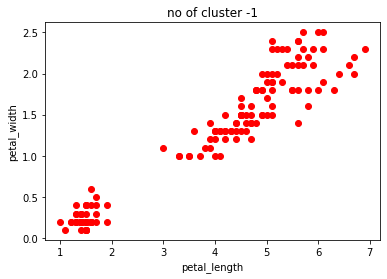

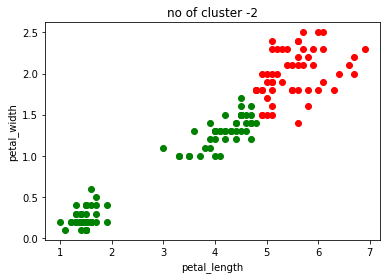

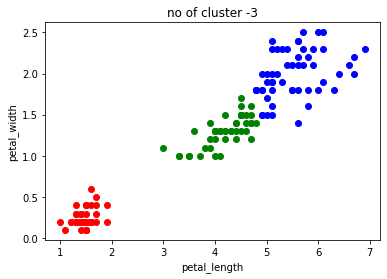

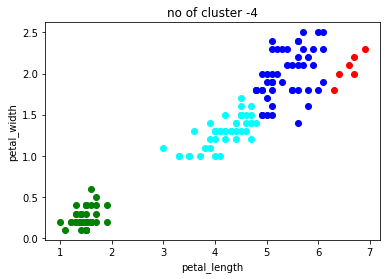

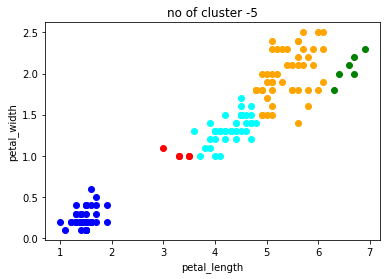

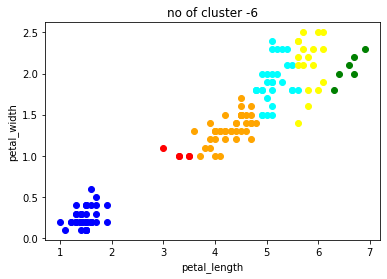

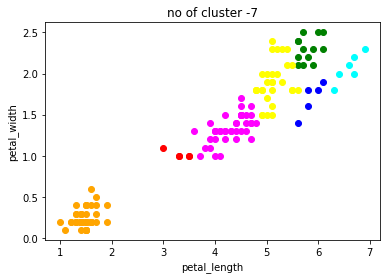

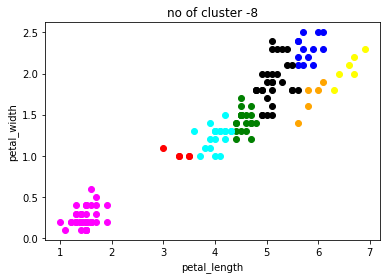

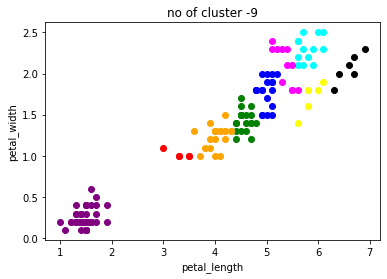

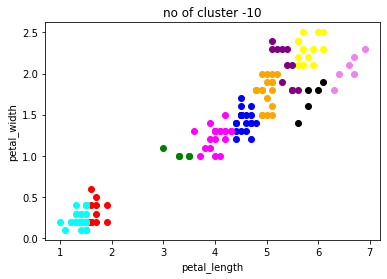

In [36]:
# applying Hierarchical Clustering Algorithm with average_linkage on IRIS Dataset.

for u in range (10):
    # labels=['cluster'+str(i) for i in range(10)]
    color=['red','green','blue','cyan','orange','yellow','magenta','black','purple','violet']
    i = 0
    for v in z[u]:
        plt.scatter(*zip(*v),c=color[i])
        i = i+1
    plt.title('no of cluster -'+str(u+1))
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    # plt.legend()
    plt.show()

In [37]:
# Finding centroid
def mean(l):
    return (sum([i[0] for i in l])/len(l),sum([i[1] for i in l])/len(l))

# Calculating intra variance.
def intra_dist(clusters):
    centroids = [mean(i) for i in clusters]
    distance = [[dist(j,centroids[i]) for j in clusters[i]] for i in range(len(centroids))]
    j = sum([sum(i) for i in distance])
    return j

# Calculating inter variance.
def inter_dist(clusters):
    centroids = [mean(i) for i in clusters]
    dd = []
    for i in range(len(centroids)):
        for j in range(len(centroids)):
            if i<j:
                dd.append(dist(centroids[i],centroids[j]))
    return(len(x)*min(dd))

# Calculating xie-beni index.
xie_beni = [intra_dist(clusters)/inter_dist(clusters) for clusters in z[1:11]]

In [38]:
print('The optimal no of cluster is -')
xie_beni.index(min(xie_beni))+2

The optimal no of cluster is -


3

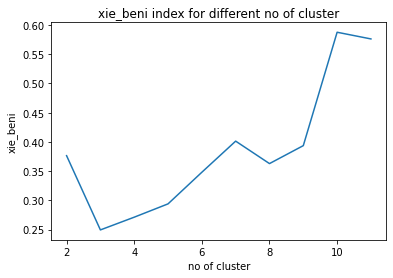

In [39]:
# Ploting Xie-beni index for different no of clusters.

plt.plot(range(2,12),xie_beni)
plt.title('xie_beni index for different no of cluster')
plt.xlabel('no of cluster')
plt.ylabel('xie_beni')
# plt.legend()
plt.show()